In [65]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

file_path = "data.csv"
df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "uciml/breast-cancer-wisconsin-data", file_path)

df.head()

/tmp/ipykernel_105584/3476062579.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "uciml/breast-cancer-wisconsin-data", file_path)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [67]:
df.drop(columns=['id', 'Unnamed: 32'],inplace=True)

In [68]:
df.shape

(569, 31)

In [69]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


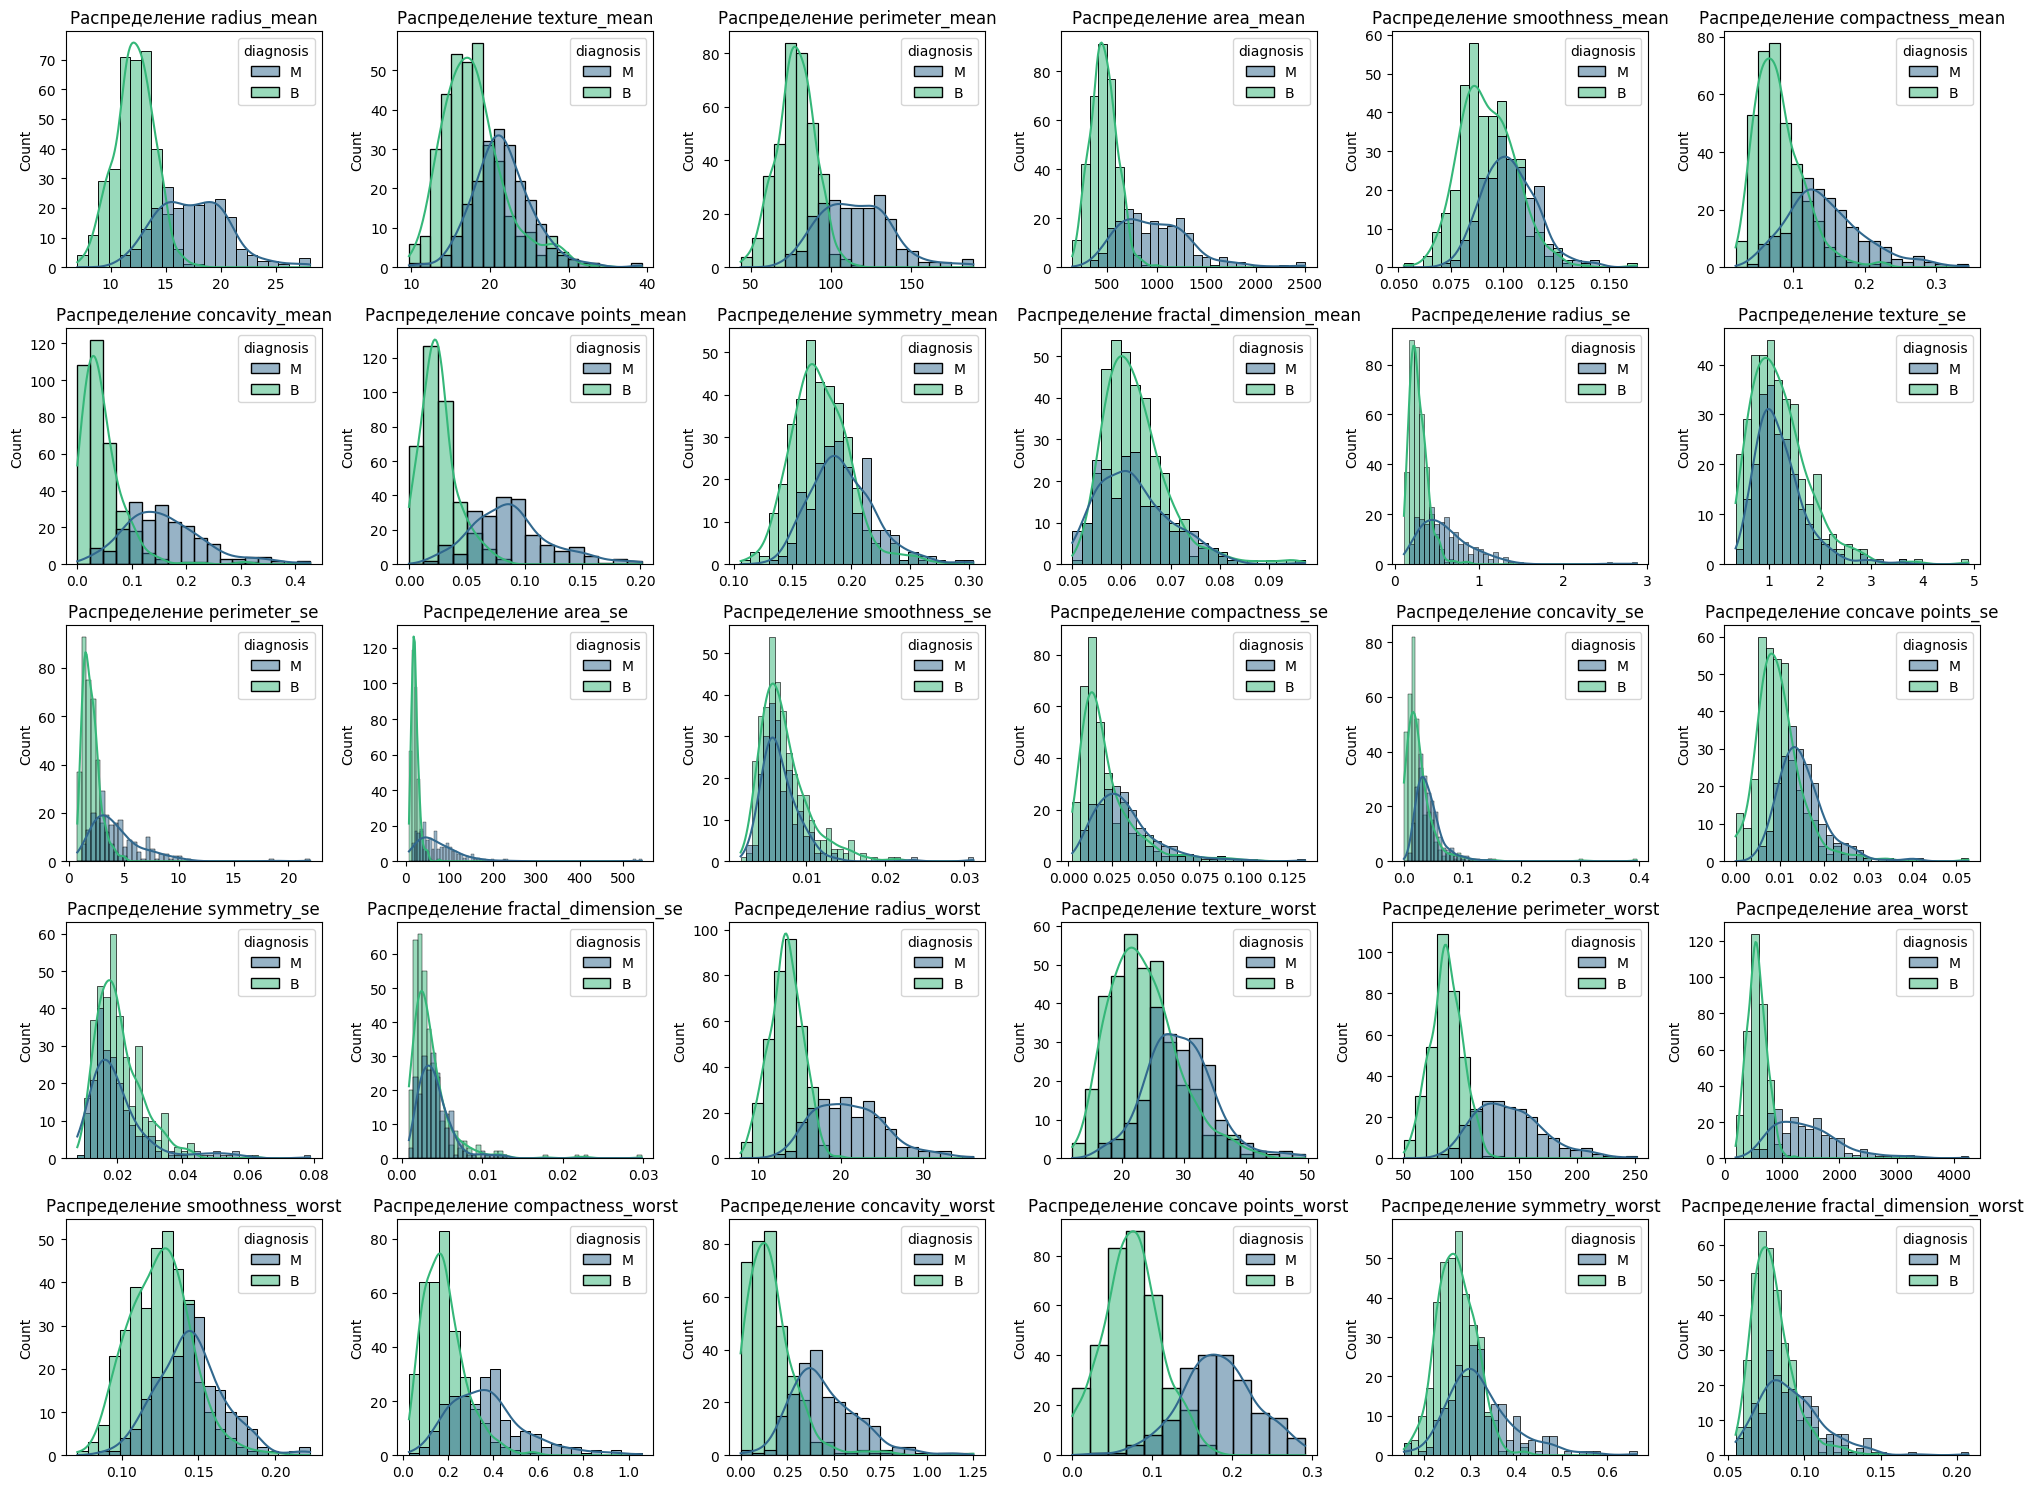

In [70]:
import seaborn as sns

data = df.copy()

numeric_features = data.columns.drop('diagnosis')

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(5, 6, i)
    sns.histplot(data=data, x=feature, hue='diagnosis', kde=True, palette='viridis', alpha=0.5)
    plt.title(f'Распределение {feature}')
    plt.xlabel('')
    plt.tight_layout()

plt.show()

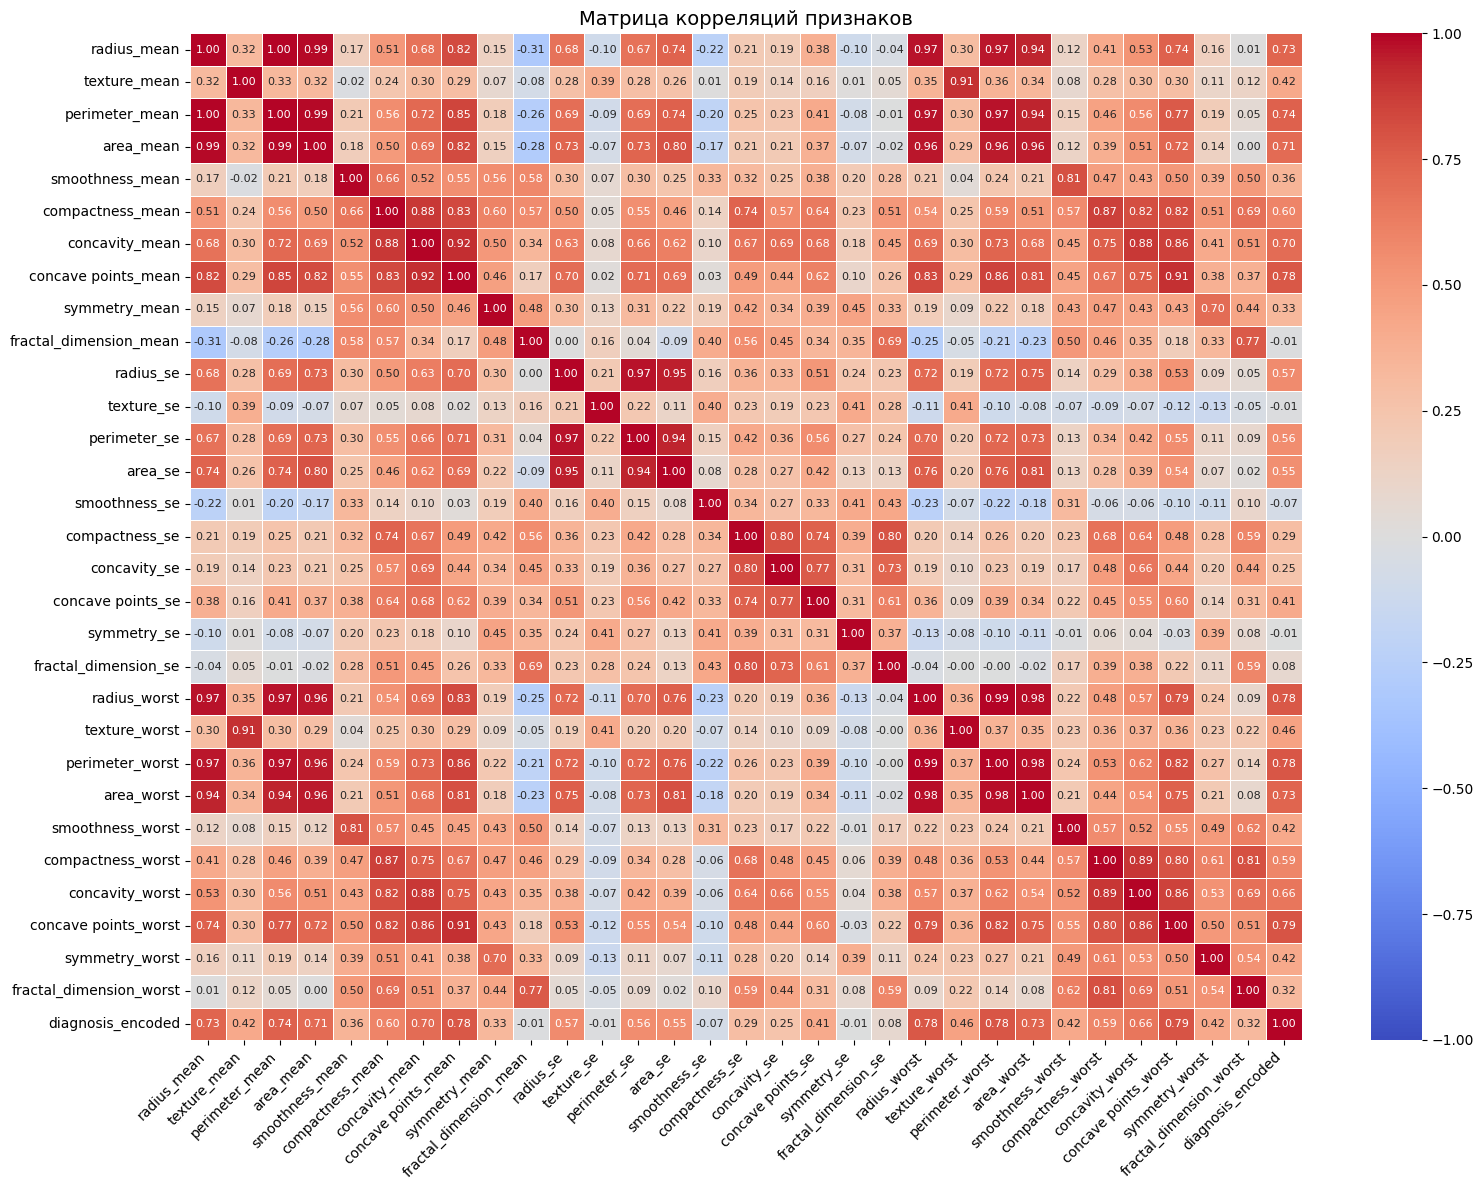

In [71]:
data = df.copy()
data['diagnosis_encoded'] = data['diagnosis'].map({'M': 1, 'B': 0})

correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(16, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5, 
    annot_kws={'size': 8}
)

plt.title('Матрица корреляций признаков', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

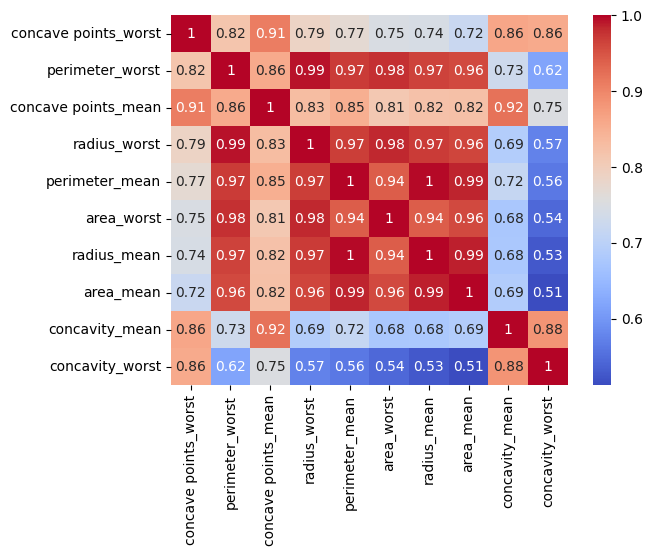

In [72]:
top_features = correlation_matrix['diagnosis_encoded'].abs().sort_values(ascending=False).index[1:11]
sns.heatmap(data[top_features].corr(), annot=True, cmap='coolwarm') # топ-10 признаков по корреляции с diagnosis_encoded

Видно что признаки хорошо коррелируют друг с другом.
C целевой переменной deagnosis коррелирует 7 признаков с коэффициентом корреляции больше 0.7

Сильно скоррелированные пары признаков (|r| > 0.9):
radius_mean & perimeter_mean: r = 1.00
radius_mean & area_mean: r = 0.99
radius_mean & radius_worst: r = 0.97
radius_mean & perimeter_worst: r = 0.97
radius_mean & area_worst: r = 0.94
texture_mean & texture_worst: r = 0.91
perimeter_mean & area_mean: r = 0.99
perimeter_mean & concave points_mean: r = 0.85
perimeter_mean & radius_worst: r = 0.97
perimeter_mean & perimeter_worst: r = 0.97
perimeter_mean & area_worst: r = 0.94
area_mean & radius_worst: r = 0.96
area_mean & perimeter_worst: r = 0.96
area_mean & area_worst: r = 0.96
compactness_mean & concavity_mean: r = 0.88
compactness_mean & compactness_worst: r = 0.87
concavity_mean & concave points_mean: r = 0.92
concavity_mean & concavity_worst: r = 0.88
concavity_mean & concave points_worst: r = 0.86
concave points_mean & perimeter_worst: r = 0.86
concave points_mean & concave points_worst: r = 0.91
radius_se & perimeter_se: r = 0.97
radius_se & area_se: r = 0.95
perimeter_se & are

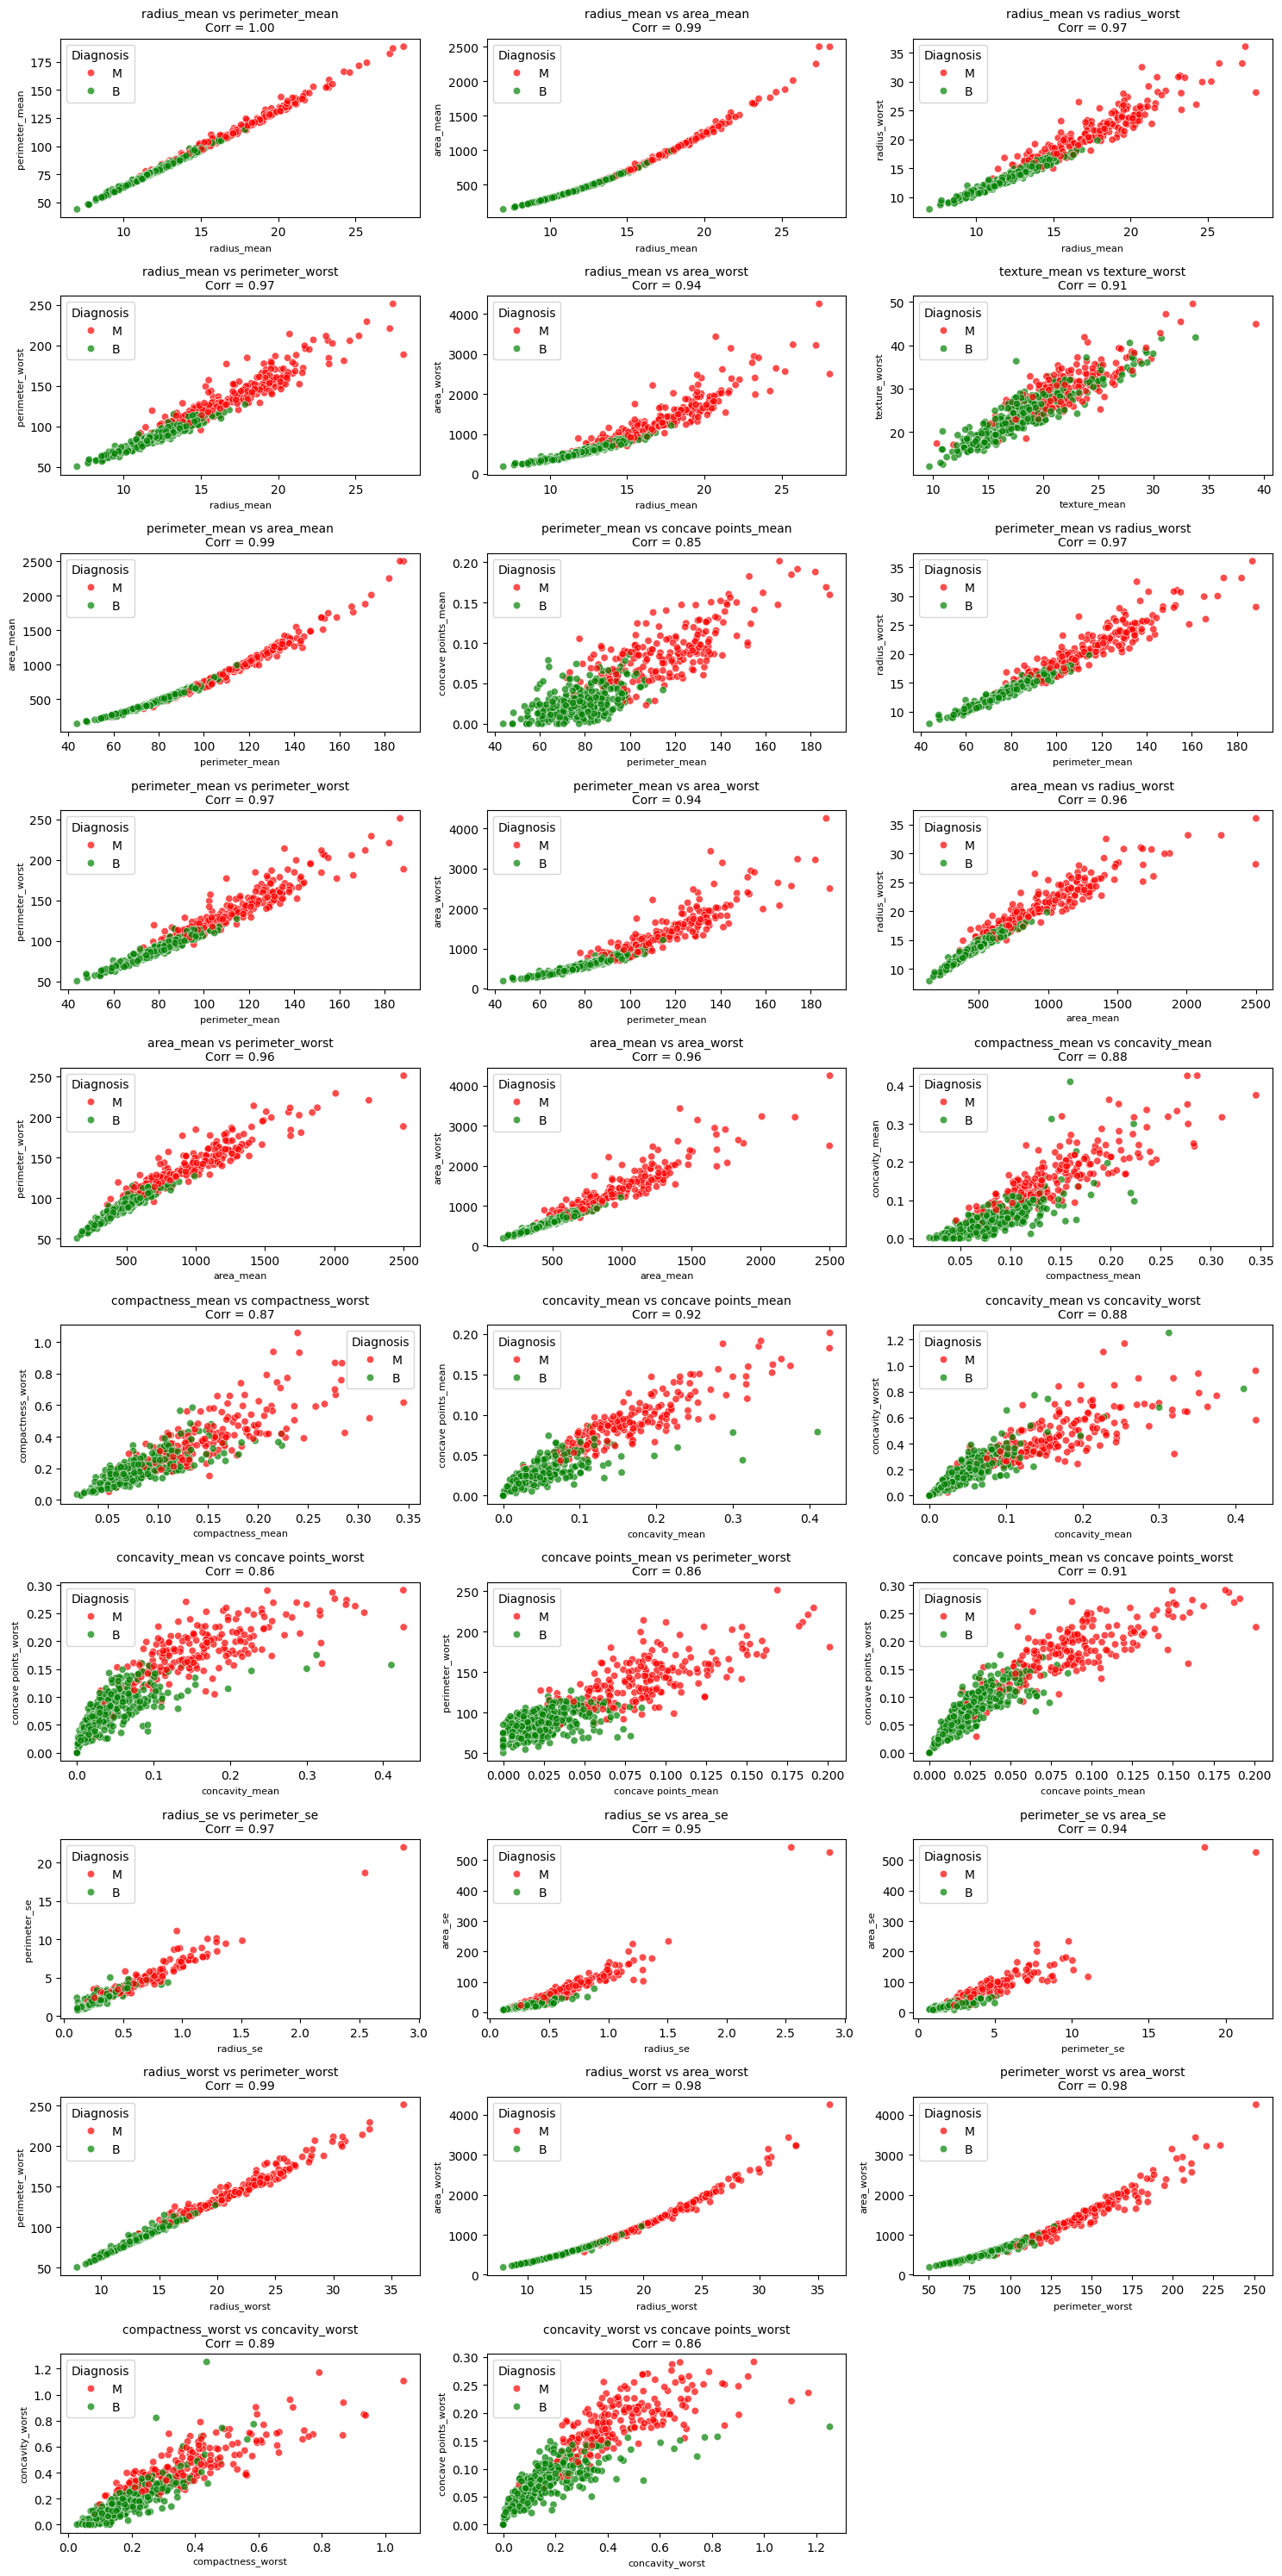

In [ ]:
corr_matrix = data.corr(numeric_only=True)

high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.85:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("Сильно скоррелированные пары признаков (|r| > 0.85):")
for pair in high_corr_pairs:
    print(f"{pair[0]} & {pair[1]}: r = {pair[2]:.2f}")
    
print("high_corr_pairs count:", len(high_corr_pairs))

plt.figure(figsize=(15, 30))
for idx, (feat1, feat2, corr) in enumerate(high_corr_pairs, 1):
    plt.subplot(10, 3, idx)
    sns.scatterplot(
        data=data,
        x=feat1,
        y=feat2,
        hue='diagnosis',
        palette={'M': 'red', 'B': 'green'},
        alpha=0.7,
    )
    plt.title(f'{feat1} vs {feat2}\nCorr = {corr:.2f}', fontsize=10)
    plt.xlabel(feat1, fontsize=8)
    plt.ylabel(feat2, fontsize=8)
    plt.legend(title='Diagnosis')

plt.tight_layout()
plt.show()

In [74]:
y=df.iloc[:,0]
X=df.iloc[:,1:]

In [75]:
X.value_counts()
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=2)

In [77]:
X_train.shape

(398, 30)

Приводим все признаки к одному масштабу. Это необходимо для того, чтобы модель корректно учитывала признаки с большими числовыми значениями. Некоторые алгоритмы (например, градиентный спуск, SVM, k-NN, линейные модели) лучше работают на признаках с одинаковыми масштабами.

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

columns = df.columns.drop('diagnosis')
X_train_df = pd.DataFrame(X_train, columns=columns)

X_train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-4.240048e-17,4.909529e-17,1.562123e-17,2.053076e-16,1.829915e-16,-2.410132e-16,1.517491e-16,-1.629071e-16,1.091254e-15,-5.712906e-16,...,-6.694812e-17,-2.499397e-16,-1.562123e-16,2.677925e-16,4.731001e-16,-3.570567e-17,1.428227e-16,2.499397e-16,1.874547e-16,8.480095e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.089586e+00,-2.190109e+00,-2.042497e+00,-1.514347e+00,-3.018761e+00,-1.497006e+00,-1.143862e+00,-1.281740e+00,-2.410889e+00,-1.812656e+00,...,-1.786372e+00,-2.236392e+00,-1.753567e+00,-1.273806e+00,-2.084117e+00,-1.371285e+00,-1.312630e+00,-1.768696e+00,-2.187082e+00,-1.580320e+00
25%,-6.778525e-01,-7.335292e-01,-6.803939e-01,-6.596409e-01,-7.492808e-01,-7.668261e-01,-7.548149e-01,-7.322237e-01,-7.095273e-01,-7.341576e-01,...,-6.668934e-01,-7.488451e-01,-6.811157e-01,-6.458900e-01,-7.412507e-01,-6.909760e-01,-7.515795e-01,-7.871914e-01,-6.900931e-01,-7.087223e-01
50%,-2.140797e-01,-1.155692e-01,-2.179163e-01,-2.962754e-01,-7.082347e-02,-2.108791e-01,-3.322123e-01,-3.792870e-01,-4.815026e-02,-2.039520e-01,...,-2.497473e-01,-4.447294e-02,-2.657451e-01,-3.234825e-01,-3.247326e-02,-2.818670e-01,-2.247786e-01,-1.926141e-01,-1.383920e-01,-2.481574e-01
75%,5.033998e-01,5.740629e-01,5.284445e-01,3.986319e-01,6.136006e-01,5.285636e-01,5.279943e-01,5.637253e-01,5.439577e-01,4.830101e-01,...,4.302281e-01,6.453511e-01,5.429937e-01,2.934042e-01,6.120679e-01,5.574979e-01,5.103953e-01,7.178032e-01,4.728147e-01,4.373535e-01
max,3.957657e+00,4.484988e+00,4.101403e+00,5.613876e+00,4.756999e+00,4.721566e+00,4.472417e+00,4.158664e+00,4.189597e+00,4.683161e+00,...,4.344858e+00,3.828564e+00,4.557613e+00,6.430271e+00,3.765093e+00,5.231264e+00,4.684684e+00,2.756888e+00,4.537041e+00,6.754727e+00


In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores=[]
max_k = 16

for k in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

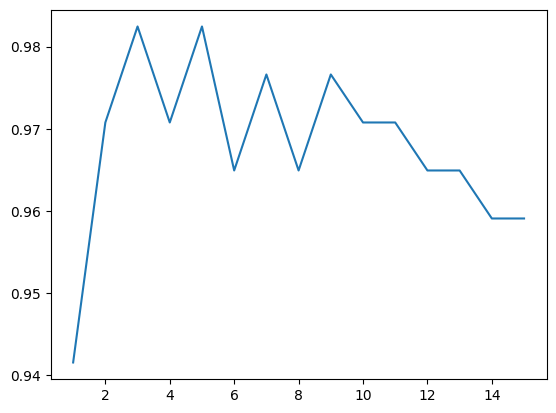

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1,max_k),scores) # Лучшее значение k=3 и k=5

In [81]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9824561403508771